<a href="https://colab.research.google.com/github/onurceyhan/hu-bby261-2021-final/blob/main/hu_bby261_2021_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST'in Rakam Veri Seti Tahmin Programına Hoş Geldiniz!
Epoch sayısını giriniz:4
x_train Şekli: (60000, 28, 28, 1)
x_train içerisindeki resim sayısı: 60000
x_test içerisindeki resim sayısı: 10000
Model yaratılıyor...
Model derleniyor...
Model eğitiliyor...
Epoch 1/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2281 - accuracy: 0.9316
Epoch 2/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0973 - accuracy: 0.9697
Epoch 3/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0678 - accuracy: 0.9789
Epoch 4/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0510 - accuracy: 0.9838
Model eğitildi!
1)MNIST veri setinden tahmin
2) Kendi çizdiğim rakamların tahmini
Açmak istediğiniz yerin numarasını giriniz.2
Tahmin Edilen Sayı: 1


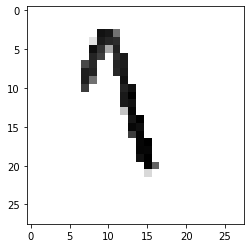

None
None


In [47]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

import matplotlib.pyplot as plt
import time
import cv2
import numpy as np

print("MNIST'in Rakam Veri Seti Tahmin Programına Hoş Geldiniz!")
time.sleep(1)
epochgiris = int(input("Epoch sayısını giriniz:"))



x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
print('x_train Şekli:', x_train.shape)
print('x_train içerisindeki resim sayısı:', x_train.shape[0])
print('x_test içerisindeki resim sayısı:', x_test.shape[0])


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
print("Model yaratılıyor...")
time.sleep(1)
model = Sequential()
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
print("Model derleniyor...")
time.sleep(1)
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
print ("Model eğitiliyor...")
time.sleep(1)
model.fit(x=x_train,y=y_train, epochs= epochgiris)
def verisetitahmin():
  numarayaz = int(input("Resim numarasını giriniz(1-10000):"))
  model.evaluate(x_test, y_test)
  image_index = numarayaz
  plt.imshow(x_test[image_index].reshape(28, 28),cmap='Blues')
  pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
  print("Tahmin edilen sayı:", pred.argmax())
def resimtahmin():
  img = cv2.imread(r"/content/1.png")
  img = cv2.resize(img, (28,28))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.bitwise_not(img) # invert image
  plt.imshow(img, cmap = plt.cm.binary)
  img = np.reshape(img, [1,28,28])
  predictionsB = model.predict(img)
  print("Tahmin Edilen Sayı:", np.argmax(predictionsB[0]))
  plt.show()
def menu():
    print("Model eğitildi!")
    print("1)MNIST veri setinden tahmin\n2) Kendi çizdiğim rakamların tahmini")
    acilis = input("Açmak istediğiniz yerin numarasını giriniz.")
    numaralar = ("1","2")
    if acilis == numaralar[0]:
        print(verisetitahmin())
    elif acilis == numaralar[1]:
        print(resimtahmin())
    else:
        print("Geçersiz bir numara girdiniz!")
        return menu()
print(menu())





